In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pytest
import ipytest
from random import randint
from skimage.morphology import label
from skimage.measure import regionprops

## Get centroids from binary image

In [4]:
def get_points(binary_img) -> tuple:
    labelled = label(binary_img)
    regions = regionprops(labelled)
    points = np.ndarray((len(regions), 2))
    for props_index, props in enumerate(regions):
        points[props_index, :] = props.centroid
    
    return points

# Area of arbitrary closed polygon

In [47]:
def shoelace(points: np.ndarray):
    points = np.append(points, points[0]).reshape(-1, 2)
    area = 0
    for index in range(len(points)-1):
        matrix = points[index:index+2, :].T
        area += np.linalg.det(matrix)
    return np.round(area/2, 5)

def test_shoelace():
    points = np.array(
        [
            [1, 6],
            [3, 1],
            [7, 2],
            [4, 4],
            [8, 5],
        ]
    )

    assert shoelace(points) == 16.5

    points = np.array(
        [
            [0, 0],
            [1, 0],
            [1, 1],
            [0, 1],
        ]
    )

    assert shoelace(points) == 1.0

In [48]:
ipytest.run()

======================================= test session starts ========================================
platform darwin -- Python 3.10.9, pytest-7.2.1, pluggy-1.0.0
Matplotlib: 3.6.3
Freetype: 2.6.1
rootdir: /Users/sylvi/Documents/TopoStats, configfile: pyproject.toml
plugins: xdist-3.1.0, regtest-1.5.0, mpl-0.16.1, cov-4.0.0, anyio-3.6.2
collected 1 item

t_84d2eb3ca77142dca8c23141b5ab671e.py .                                                      [100%]WARNING: Failed to generate report: No data to report.



---------- coverage: platform darwin, python 3.10.9-final-0 ----------


======================================== 1 passed in 0.02s =========================================


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/coverage/report.py:114: CoverageWarning: Couldn't parse '/private/var/folders/sr/wjtfqr9s6x3bw1s647t649x80000gn/T/ipykernel_1345/1405329698.py': No source for code: '/private/var/folders/sr/wjtfqr9s6x3bw1s647t649x80000gn/T/ipykernel_1345/1405329698.py'. (couldnt-parse)
  coverage._warn(msg, slug="couldnt-parse")
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/pytest_cov/plugin.py:311: CovReportWarning: Failed to generate report: No data to report.

  warnings.warn(CovReportWarning(message))


<ExitCode.OK: 0>

16.5


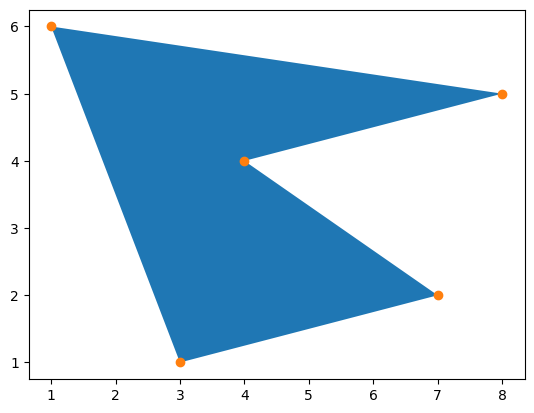

In [40]:
points = np.array(
    [
        [1, 6],
        [3, 1],
        [7, 2],
        [4, 4],
        [8, 5],
    ]
)

plt.fill(points[:, 0], points[:, 1])
plt.scatter(x=points[:, 0], y=points[:, 1])

area = shoelace(points)
print(np.round(area, 5))


# Perimeter of arbitrary closed loop of points

In [94]:
def polygon_perimeter(points: np.ndarray):
    points = np.append(points, points[0]).reshape(-1, 2)
    perimeter = 0
    for i in range(len(points)-1):
        point1 = points[i, :]
        point2 = points[i+1, :]
        perimeter += np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
    return perimeter

def test_perimeter():
    points = np.array([[0, 0], [0, 1], [1, 1], [1, 0]])
    perimeter = polygon_perimeter(points)
    assert perimeter == 4.0

# Separations of points

In [78]:
from scipy.spatial import distance
def point_distances(points: np.ndarray):
    distance_matrix = distance.cdist(points, points, 'euclidean')
    distances = distance_matrix[np.triu_indices(points.shape[0], k=1)]
    return np.round(distances, 5)

def test_point_distances():
    points = np.array(
        [
            [0, 0],
            [0, 1],
            [1, 0],
            [1, 1]
        ]
    )

    distances = point_distances(points)
    np.testing.assert_array_equal(distances, np.array([1., 1., 1.41421, 1.41421, 1., 1.]))

# Volume and area of points

In [7]:
from skimage.morphology import remove_small_objects, label
from skimage.measure import regionprops


def region_stats(labelled_image: np.ndarray, image: np.ndarray):

    region_props = regionprops(label_image=labelled_image)
    areas = np.zeros(len(region_props))
    volumes = np.zeros(len(region_props))
    max_heights = np.zeros(len(region_props))
    mean_heights = np.zeros(len(region_props))
    for props_index, props in enumerate(region_props):
        areas[props_index] = props.area
        region_points = np.where(labelled_image == props.label)
        region_values = image[region_points]
        volume = np.sum(region_values)
        volumes[props_index] = volume
        max_heights[props_index] = np.max(region_values)
        mean_heights[props_index] = np.mean(region_values)

    return {
        'areas': areas,
        'volumes': volumes,
        'max_heights': max_heights,
        'mean_heights': mean_heights,
        'number_of_regions': len(region_props),
    }

def test_region_stats():

    image = np.array(
        [
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 5, 5, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 5, 5, 1, 0, 8, 8, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 8, 8, 8, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 8, 1, 0, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 0, 3, 3, 0],
            [0, 0, 1, 9, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 9, 9, 9, 1, 0, 0, 4, 4, 0],
            [0, 0, 0, 9, 9, 1, 0, 0, 4, 4, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        ]
    )

    labelled = label(image>2, background=0)

    results = region_stats(labelled_image=labelled, image=image)

    print(results)

    np.testing.assert_equal(
        results,
        {
            'areas': np.array([4, 6, 2, 6, 4]),
            'volumes': np.array([20, 48, 6, 54, 16]),
            'max_heights': np.array([5, 8, 3, 9, 4]),
            'mean_heights': np.array([5, 8, 3, 9, 4]),
            'number_of_regions': 5
        }
    )


In [40]:
def is_clockwise(p_1: tuple, p_2: tuple, p_3: tuple) -> bool:
    """Function to determine if three points make a clockwise or counter-clockwise turn.

    Parameters
    ----------
    p_1: tuple
        First point to be used to calculate turn.
    p_2: tuple
        Second point to be used to calculate turn.
    p_3: tuple
        Third point to be used to calculate turn.

    Returns
    -------
    boolean
        Indicator of whether turn is clockwise.
    """

    rotation_matrix = np.array(((p_1[0], p_1[1], 1), (p_2[0], p_2[1], 1), (p_3[0], p_3[1], 1)))
    return not np.linalg.det(rotation_matrix) > 0

def get_triangle_height(base_point_1: np.array, base_point_2: np.array, top_point: np.array) -> float:
    """Returns the height of a triangle defined by the input point vectors.
    Parameters
    ----------
    base_point_1: np.ndarray
        a base point of the triangle, eg: [5, 3].

    base_point_2: np.ndarray
        a base point of the triangle, eg: [8, 3].

    top_point: np.ndarray
        the top point of the triangle, defining the height from the line between the two base points, eg: [6,10].

    Returns
    -------
    Float
        The height of the triangle - ie the shortest distance between the top point and the line between the two base points.
    """

    # Height of triangle = A/b = ||AB X AC|| / ||AB||
    a_b = base_point_1 - base_point_2
    a_c = base_point_1 - top_point
    return np.linalg.norm(np.cross(a_b, a_c)) / np.linalg.norm(a_b)

def ferets(edges: np.ndarray) -> float:
    """Returns the minimum and maximum feret diameters for a grain.
    These are defined as the smallest and greatest distances between
    a pair of callipers that are rotating around a 2d object, maintaining
    contact at all times.

    Parameters
    ----------
    edge_points: list
        a list of the vector positions of the pixels comprising the edge of the
        grain. Eg: [[0, 0], [1, 0], [2, 1]]
    Returns
    -------
    min_feret: float
        the minimum feret diameter of the grain
    max_feret: float
        the maximum feret diameter of the grain"""

    # Sort the vectors by x coordinate then y coordinate
    sorted_indices = np.lexsort((edges[:, 1], edges[:, 0]))
    sorted = edges[sorted_indices]

    # Construct upper and lower hulls for the edge points.
    upper_hull = []
    lower_hull = []
    for point in sorted:
        print(point)
        while len(lower_hull) > 1 and is_clockwise(lower_hull[-2], lower_hull[-1], point):
            lower_hull.pop()
        lower_hull.append(point)
        while len(upper_hull) > 1 and not is_clockwise(upper_hull[-2], upper_hull[-1], point):
            upper_hull.pop()
        upper_hull.append(point)
    
    upper_hull = np.array(upper_hull)
    lower_hull = np.array(lower_hull)

    # Create list of contact vertices for calipers on the antipodal hulls
    contact_points = []
    upper_index = 0
    lower_index = len(lower_hull) - 1
    min_feret = None
    while upper_index < len(upper_hull) - 1 or lower_index > 0:
        contact_points.append([lower_hull[lower_index, :], upper_hull[upper_index, :]])
        # If we have reached the end of the upper hull, continute iterating over the lower hull
        if upper_index == len(upper_hull) - 1:
            lower_index -= 1
            small_feret = get_triangle_height(
                np.array(lower_hull[lower_index + 1, :]),
                np.array(lower_hull[lower_index, :]),
                np.array(upper_hull[upper_index, :]),
            )
            if min_feret is None or small_feret < min_feret:
                min_feret = small_feret
        # If we have reached the end of the lower hull, continue iterating over the upper hull
        elif lower_index == 0:
            upper_index += 1
            small_feret = get_triangle_height(
                np.array(upper_hull[upper_index - 1, :]),
                np.array(upper_hull[upper_index, :]),
                np.array(lower_hull[lower_index, :]),
            )
            if min_feret is None or small_feret < min_feret:
                min_feret = small_feret
        # Check if the gradient of the last point and the proposed next point in the upper hull is greater than the gradient
        # of the two corresponding points in the lower hull, if so, this means that the next point in the upper hull
        # will be encountered before the next point in the lower hull and vice versa.
        # Note that the calculation here for gradients is the simple delta upper_y / delta upper_x > delta lower_y / delta lower_x
        # however I have multiplied through the denominators such that there are no instances of division by zero. The
        # inequality still holds and provides what is needed.
        elif (upper_hull[upper_index + 1, 1] - upper_hull[upper_index, 1]) * (
            lower_hull[lower_index, 0] - lower_hull[lower_index - 1, 0]
        ) > (lower_hull[lower_index, 1] - lower_hull[lower_index - 1, 1]) * (
            upper_hull[upper_index + 1, 0] - upper_hull[upper_index, 0]
        ):
            # If the upper hull is encoutnered first, increment the iteration index for the upper hull
            # Also consider the triangle that is made as the two upper hull vertices are colinear with the caliper
            upper_index += 1
            small_feret = get_triangle_height(
                np.array(upper_hull[upper_index - 1, :]),
                np.array(upper_hull[upper_index, :]),
                np.array(lower_hull[lower_index, :]),
            )
            if min_feret is None or small_feret < min_feret:
                min_feret = small_feret
        else:
            # The next point in the lower hull will be encountered first, so increment the lower hull iteration index.
            lower_index -= 1
            small_feret = get_triangle_height(
                np.array(lower_hull[lower_index + 1, :]),
                np.array(lower_hull[lower_index, :]),
                np.array(upper_hull[upper_index, :]),
            )

            if min_feret is None or small_feret < min_feret:
                min_feret = small_feret

    contact_points = np.array(contact_points)

    # Find the minimum and maximum distance in the contact points
    max_feret = None
    for point_pair in contact_points:
        dist = np.sqrt((point_pair[0, 0] - point_pair[1, 0]) ** 2 + (point_pair[0, 1] - point_pair[1, 1]) ** 2)
        if max_feret is None or max_feret < dist:
            max_feret = dist

    return min_feret, max_feret


[1. 0.]
[ 1.5 12. ]
[2. 0.]


(0.999133073092352, 12.010412149464313)

## Curvature

In [6]:
def curvature(xs: np.ndarray, ys: np.ndarray):
    extension_length = xs.shape[0]
    xs_extended = np.append(xs, xs)
    xs_extended = np.append(xs_extended, xs)
    ys_extended = np.append(ys, ys)
    ys_extended = np.append(ys_extended, ys)
    dx = np.gradient(xs_extended)
    dy = np.gradient(ys_extended)
    d2x = np.gradient(dx)
    d2y = np.gradient(dy)
    curv = np.abs(dx * d2y - d2x * dy) / (dx * dx + dy * dy)**1.5
    curv = curv[extension_length:(len(curv)-extension_length)+1]
    return curv

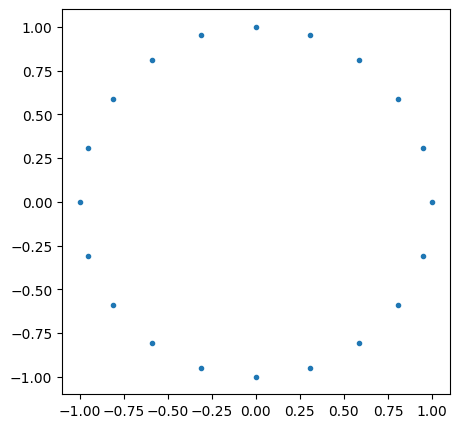

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


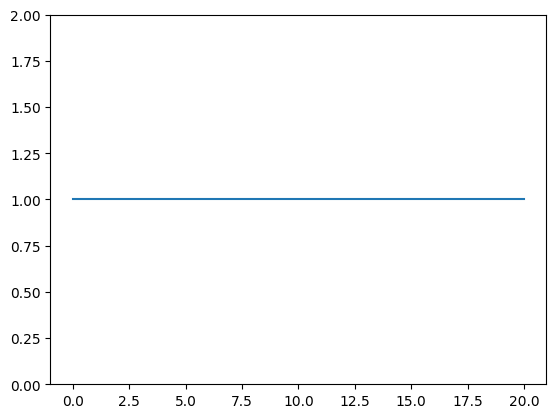

In [28]:
number_of_points = 20
xs = np.zeros((number_of_points))
ys = np.zeros((number_of_points))
stepsize = 2*np.pi / xs.shape[0]
radius = 1
angle = 0
for i in range(xs.shape[0]):
    xs[i] = radius * np.sin(angle)
    ys[i] = radius * np.cos(angle)
    angle += stepsize

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(xs, ys, '.')
plt.show()

curv = curvature(xs, ys)
plt.plot(curv)
plt.ylim(0, 2)
print(curv)

In [8]:
ipytest.run()

======================================= test session starts ========================================
platform darwin -- Python 3.10.9, pytest-7.2.1, pluggy-1.0.0
Matplotlib: 3.6.3
Freetype: 2.6.1
rootdir: /Users/sylvi/Documents/TopoStats, configfile: pyproject.toml
plugins: xdist-3.1.0, regtest-1.5.0, mpl-0.16.1, cov-4.0.0, anyio-3.6.2
collected 1 item

t_7bc6c5db52d14b889f31be47e9a05f37.py .                                                      [100%]WARNING: Failed to generate report: No data to report.



---------- coverage: platform darwin, python 3.10.9-final-0 ----------


======================================== 1 passed in 0.02s =========================================


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/coverage/report.py:114: CoverageWarning: Couldn't parse '/private/var/folders/sr/wjtfqr9s6x3bw1s647t649x80000gn/T/ipykernel_4512/2831658880.py': No source for code: '/private/var/folders/sr/wjtfqr9s6x3bw1s647t649x80000gn/T/ipykernel_4512/2831658880.py'. (couldnt-parse)
  coverage._warn(msg, slug="couldnt-parse")
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/pytest_cov/plugin.py:311: CovReportWarning: Failed to generate report: No data to report.

  warnings.warn(CovReportWarning(message))


<ExitCode.OK: 0>